In [1]:
import os
import pandas as pd

In [2]:
param_path = '../inputs/parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas.json'
# Get the filename from the path, without extension
param_filename = os.path.splitext(os.path.basename(param_path))[0]

n_saltelli_samples = 61440

figures_path = f'../outputs/sa_results/saltelli_samples_{n_saltelli_samples}_{param_filename}/'

In [3]:
# Load the simulations summary stats to get feature names
summary_stats = pd.read_csv(os.path.join(f'../outputs/simulations/output_{n_saltelli_samples}_samples_{param_filename}/simulations_summary.csv'))

all_features = summary_stats.columns.to_list()

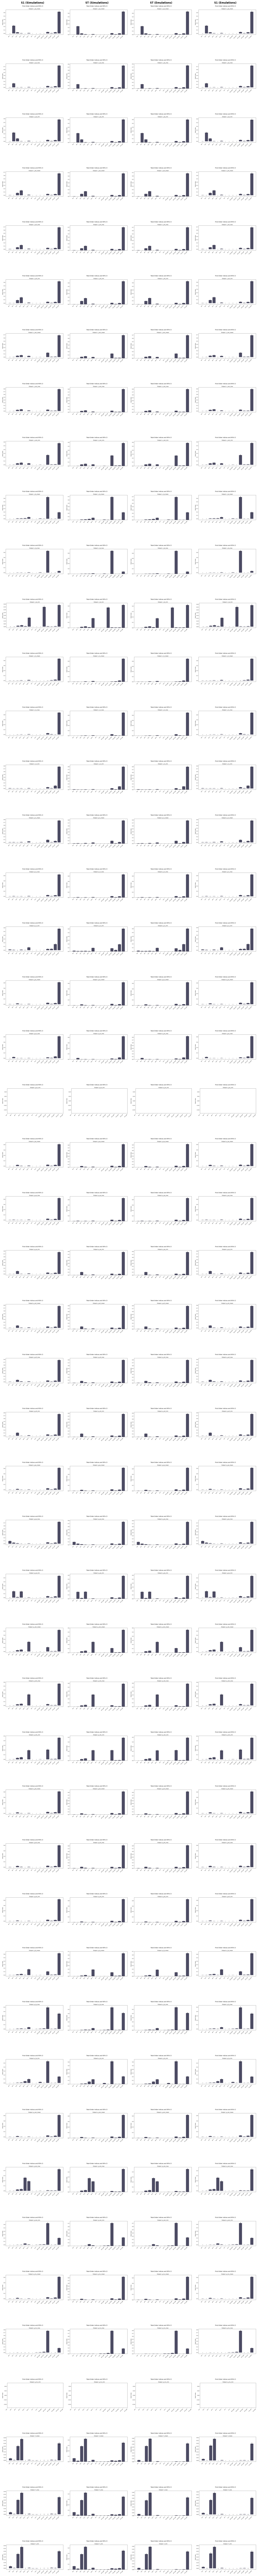

Collage saved to: ../outputs/sa_results/saltelli_samples_61440_parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas/sensitivity_analysis_collage.png
Created 48 x 4 figure collage


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Define the figure layout
n_features = len(all_features)
n_cols = 4
fig, axes = plt.subplots(n_features, n_cols, figsize=(20, 4*n_features))

# Column titles
col_titles = ['S1 (Simulations)', 'ST (Simulations)', 'ST (Emulations)', 'S1 (Emulations)']

# File patterns for each column
file_patterns = [
    ('simulations', 's1_indices.png'),
    ('simulations', 'st_indices.png'), 
    ('emulations', 'st_indices.png'),
    ('emulations', 's1_indices.png')
]

# Loop through each feature (row)
for i, feature in enumerate(all_features):
    feature_folder = os.path.join(figures_path, feature)
    
    # Loop through each column
    for j, (subfolder, filename) in enumerate(file_patterns):
        ax = axes[i, j] if n_features > 1 else axes[j]
        
        # Construct the full path to the image
        img_path = os.path.join(feature_folder, subfolder, filename)
        
        # Check if file exists and load image
        if os.path.exists(img_path):
            try:
                img = mpimg.imread(img_path)
                ax.imshow(img)
                ax.axis('off')
            except Exception as e:
                ax.text(0.5, 0.5, f'Error loading\n{filename}', 
                       ha='center', va='center', transform=ax.transAxes)
                ax.axis('off')
        else:
            # Display placeholder if file doesn't exist
            ax.text(0.5, 0.5, f'Missing:\n{filename}', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.axis('off')
        
        # Add column titles to the first row
        if i == 0:
            ax.set_title(col_titles[j], fontsize=12, fontweight='bold')
    
    # Add feature name as row label
    if n_features > 1:
        axes[i, 0].set_ylabel(feature, rotation=90, fontsize=10, fontweight='bold')
    else:
        axes[0].set_ylabel(feature, rotation=90, fontsize=10, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.05)

# Save the collage
output_path = os.path.join(figures_path, 'sensitivity_analysis_collage.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Collage saved to: {output_path}")
print(f"Created {n_features} x {n_cols} figure collage")